In [1]:
import json
with open('gearnet_ablation_pipeline.json', 'r') as f:
    data = json.load(f)
    
data


[{'parameters': {'layer': 4,
   'knn_k': 5,
   'spatial_radius': 5.0,
   'sequential_max_distance': 1},
  'trials': [[{'sensitivity': 0.15470494329929352,
     'specificity': 0.9823155403137207,
     'accuracy': 0.9394515156745911,
     'precision': 0.3233333230018616,
     'mcc': 0.1953256401301807,
     'micro_auroc': 0.6480510234832764,
     'train_bce': 0.21106919471605595,
     'valid_mcc': 0.21901449516040733},
    {'sensitivity': 0.24720893800258636,
     'specificity': 0.9887620806694031,
     'accuracy': 0.9503551721572876,
     'precision': 0.5457746386528015,
     'mcc': 0.34549344999509773,
     'micro_auroc': 0.7862564921379089,
     'train_bce': 0.17373034264615983,
     'valid_mcc': 0.2749804235549025},
    {'sensitivity': 0.2583732008934021,
     'specificity': 0.9891976714134216,
     'accuracy': 0.9513464570045471,
     'precision': 0.5664335489273071,
     'mcc': 0.36123813230232915,
     'micro_auroc': 0.7756038308143616,
     'train_bce': 0.14827589987492526,
     

In [2]:
from lib.utils import statistics_per_key
ls = []
for param_and_trials in data:
    parameters = param_and_trials['parameters']
    trials = param_and_trials['trials']
    ls.append({
        'parameters': parameters,
        'stat': statistics_per_key([trial[-4] for trial in trials])
    })

ls.sort(key=lambda x: x['stat']['mcc'][0], reverse=True)
mcc_lists = list(map(lambda a: {**a['parameters'], 'mcc': a['stat']['mcc'][0]}, ls))
mcc_lists

/home/jaechanlee/miniconda3/envs/jc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[{'layer': 4,
  'knn_k': 5,
  'spatial_radius': 10.0,
  'sequential_max_distance': 4,
  'mcc': 0.5022635139216709},
 {'layer': 4,
  'knn_k': 5,
  'spatial_radius': 10.0,
  'sequential_max_distance': 6,
  'mcc': 0.485765699497433},
 {'layer': 4,
  'knn_k': 5,
  'spatial_radius': 10.0,
  'sequential_max_distance': 5,
  'mcc': 0.47748078552949047},
 {'layer': 4,
  'knn_k': 5,
  'spatial_radius': 10.0,
  'sequential_max_distance': 3,
  'mcc': 0.4596569141101995},
 {'layer': 4,
  'knn_k': 5,
  'spatial_radius': 5.0,
  'sequential_max_distance': 4,
  'mcc': 0.4584923828318745},
 {'layer': 4,
  'knn_k': 5,
  'spatial_radius': 5.0,
  'sequential_max_distance': 6,
  'mcc': 0.45282770266441125},
 {'layer': 4,
  'knn_k': 15,
  'spatial_radius': 5.0,
  'sequential_max_distance': 3,
  'mcc': 0.44903611945015726},
 {'layer': 4,
  'knn_k': 5,
  'spatial_radius': 5.0,
  'sequential_max_distance': 5,
  'mcc': 0.44791893297474217},
 {'layer': 4,
  'knn_k': 10,
  'spatial_radius': 5.0,
  'sequential_max_

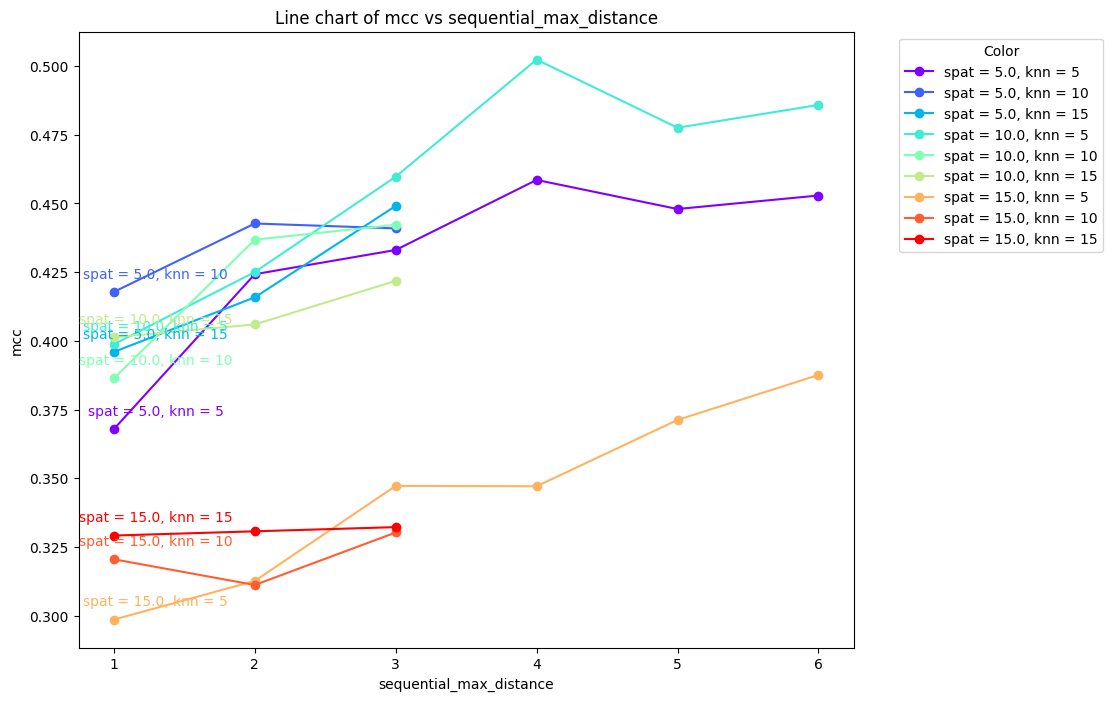

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# convert the JSON data to a DataFrame
df = pd.DataFrame(mcc_lists)

# generate a new column for color based on 'spatial_radius' and 'knn_k'
df['color'] = df['spatial_radius'].astype(str) + '-' + df['knn_k'].astype(str)

# sort the data by 'sequential_max_distance'
df.sort_values(by='sequential_max_distance', inplace=True)

plt.figure(figsize=(10, 8))

# get unique color values
colors = df['color'].unique()

# generate unique colors for each (spatial_radius, knn_k) pair
colors = plt.cm.rainbow(np.linspace(0, 1, len(df.groupby(['spatial_radius', 'knn_k']))))

# group by 'spatial_radius' and 'knn_k', and plot a line for each group
for ((spatial_radius, knn_k), group), color in zip(df.groupby(['spatial_radius', 'knn_k']), colors):
    label = f'spat = {spatial_radius}, knn = {knn_k}'

    plt.plot(group['sequential_max_distance'], group['mcc'], marker='o', color=color, label=label)
    # annotate the start of each line
    plt.annotate(label, 
                 (group['sequential_max_distance'].iloc[0], group['mcc'].iloc[0]), 
                 textcoords="offset points", # how to position the text
                 xytext=(30,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color=color) # match the color of annotation with line

plt.xlabel('sequential_max_distance')
plt.ylabel('mcc')
plt.title("Line chart of mcc vs sequential_max_distance")
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# convert the json data into a dataframe
df = pd.DataFrame(mcc_lists)

# create the linear regression model
model = LinearRegression()

# fit the model to the data
X = df[['knn_k', 'spatial_radius', 'sequential_max_distance']]
y = df['mcc']
model.fit(X, y)

# get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

(array([ 8.07315924e-05, -9.22236461e-03,  1.67755439e-02]),
 0.44619915854921577)